In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


In [2]:
img=image.load_img("image/train/COVID19/COVID19(0).jpg")

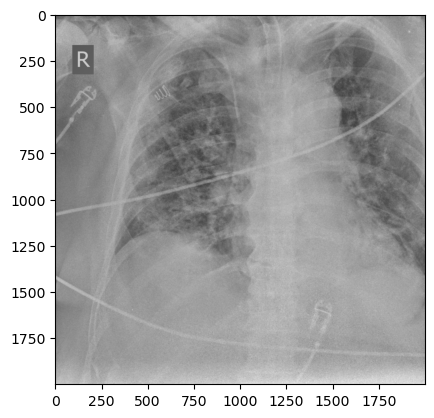

In [3]:
plt.imshow(img)
plt.show()

In [4]:
cv2.imread("image/train/COVID19/COVID19(0).jpg").shape

(2000, 2000, 3)

In [5]:
cv2.imread("image/train/COVID19/COVID19(0).jpg")

array([[[ 83,  83,  83],
        [ 84,  84,  84],
        [ 86,  86,  86],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [134, 134, 134]],

       [[ 88,  88,  88],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [131, 131, 131],
        [130, 130, 130],
        [133, 133, 133]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[204, 204, 204],
        [201, 201, 201],
        [202, 202, 202],
        ...,
        [223, 223, 223],
        [226, 226, 226],
        [222, 222, 222]],

       [[209, 209, 209],
        [204, 204, 204],
        [203, 203, 203],
        ...,
        [221, 221, 221],
        [224, 224, 224],
        [222, 222, 222]],

       [[205, 205, 205],
        [201, 201, 201],
        [204, 204, 204],
        ...,
        [220, 220, 220],
        [222, 222, 222],
        [222, 222, 222]]

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        'image/train', 
        target_size=(150, 150),  
        batch_size=250, 
        class_mode='binary')

Found 360 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
        'image/validation',
        target_size=(150, 150),  
        batch_size=250,
        class_mode='binary')

Found 360 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

C:\Users\Ankita\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=20,
      validation_data = validation_generator)

Epoch 1/20
1/1 [==============================] - 31s 31s/step - loss: 0.6942 - accuracy: 0.4545 - val_loss: 5.3666 - val_accuracy: 0.5667
Epoch 2/20
1/1 [==============================] - 22s 22s/step - loss: 6.5064 - accuracy: 0.4727 - val_loss: 7.3315 - val_accuracy: 0.4333
Epoch 3/20
1/1 [==============================] - 23s 23s/step - loss: 6.7481 - accuracy: 0.4818 - val_loss: 1.1910 - val_accuracy: 0.4333
Epoch 4/20
1/1 [==============================] - 22s 22s/step - loss: 1.2387 - accuracy: 0.4091 - val_loss: 0.6459 - val_accuracy: 0.8111
Epoch 5/20
1/1 [==============================] - 27s 27s/step - loss: 0.6457 - accuracy: 0.8000 - val_loss: 0.6755 - val_accuracy: 0.5667
Epoch 6/20
1/1 [==============================] - 22s 22s/step - loss: 0.6066 - accuracy: 0.6273 - val_loss: 0.5862 - val_accuracy: 0.8111
Epoch 7/20
1/1 [==============================] - 23s 23s/step - loss: 0.5863 - accuracy: 0.8091 - val_loss: 0.9309 - val_accuracy: 0.5667
Epoch 8/20
1/1 [===========

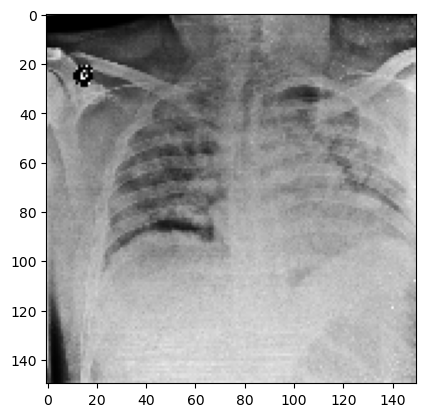

Covid detected


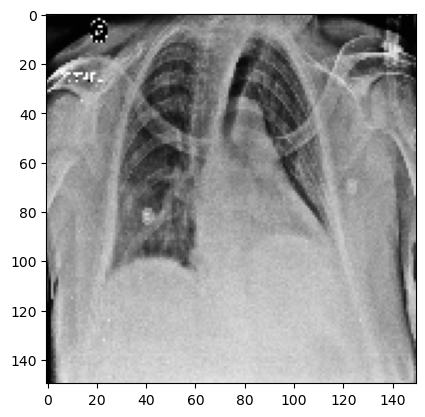

Covid detected


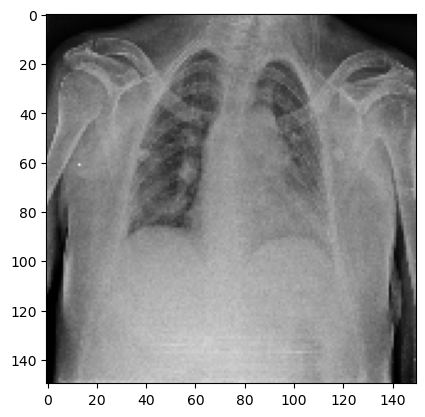

Covid detected


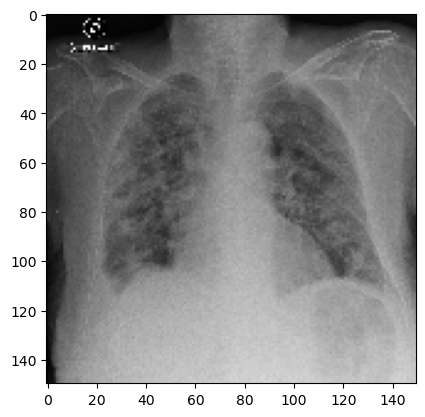

Covid detected


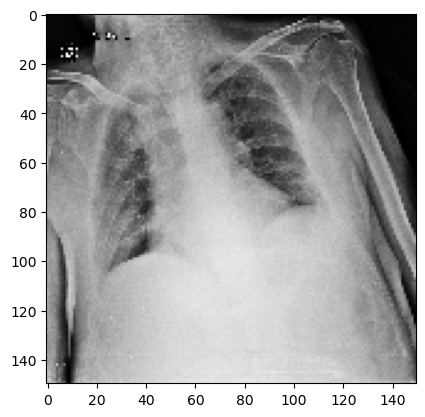

Covid detected


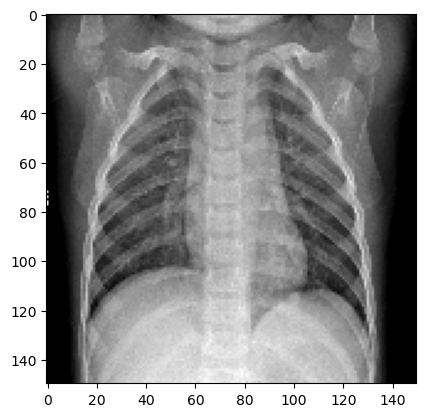

Normal


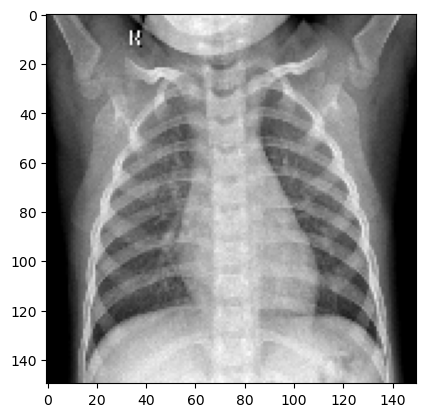

Normal


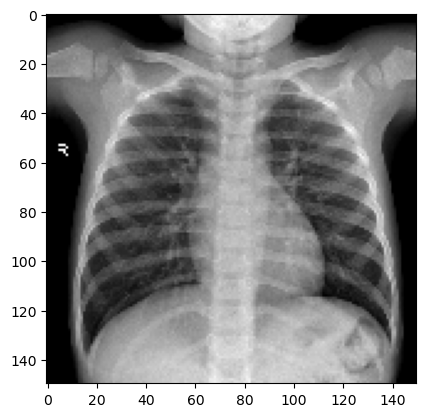

Normal


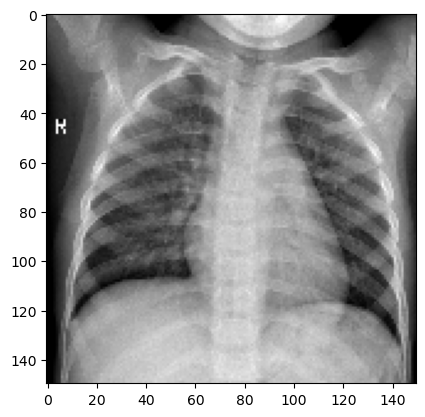

Covid detected


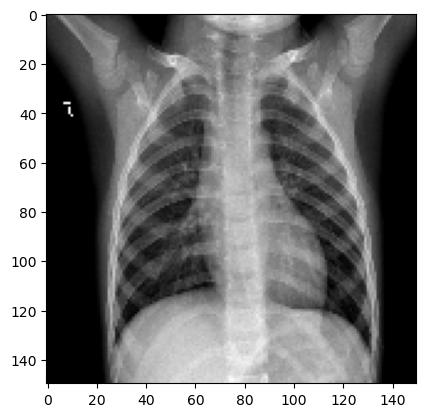

Normal


In [42]:
dir_path = "image/test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(150,150))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("Covid detected")
 
    else:
        print("Normal")

In [39]:
dir_path = "image/test"
c=0
n=0

y_pred = []
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(150,150))
   
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        c=c+1
        y_pred.append("covid-19")
 
    else:
        n=n+1
        y_pred.append("Normal")
        
print("Covid detected:",c)
print("Normal:",n)




Covid detected: 6
Normal: 4


In [40]:
import sklearn.metrics
from sklearn.metrics import accuracy_score


y_true = ["covid-19", "covid-19", "covid-19", "covid-19", "covid-19", "Normal", "Normal","Normal","Normal","Normal"]


score = accuracy_score(y_true, y_pred) * 100
print("Accuracy of test dataset using CNN: ", round(score, 1), "%") 

Accuracy of test dataset using CNN:  90.0 %


In [41]:
print (classification_report(y_true, y_pred))


              precision    recall  f1-score   support

      Normal       1.00      0.80      0.89         5
    covid-19       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



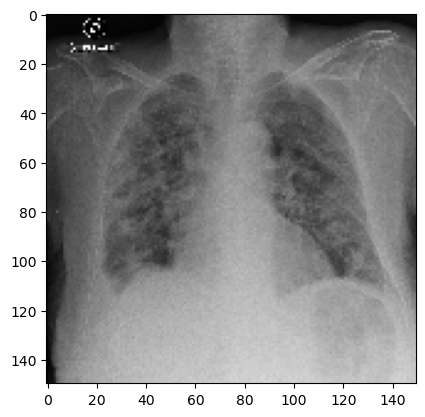

Covid detected


In [43]:
dir_path = "image/input"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(150,150))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("Covid detected")
 
    else:
        print("Normal")